In [21]:
import pandas as pd

In [22]:
dataset=pd.read_csv("PrePlacement.csv")

In [23]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [24]:
print(dataset.isnull().sum())

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


In [25]:
print (dataset.dtypes)

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object


In [26]:
# Binary mapping for categorical columns
binary_mapping = {
    'gender': {'M': 1, 'F': 0},
    'workex': {'Yes': 1, 'No': 0},  
    'status': {'Placed': 1, 'Not Placed': 0}
}
dataset.replace(binary_mapping, inplace=True)

C:\Temp\ipykernel_7236\1751464019.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(binary_mapping, inplace=True)


In [27]:
# One-Hot Encoding for categorical columns
dataset = pd.get_dummies(dataset, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t','specialisation'], drop_first=True)

In [28]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'mba_p', 'status', 'salary', 'ssc_b_Others', 'hsc_b_Others',
       'hsc_s_Commerce', 'hsc_s_Science', 'degree_t_Others',
       'degree_t_Sci&Tech', 'specialisation_Mkt&HR'],
      dtype='object')

In [ ]:
dataset

In [29]:
# Handle missing values in salary column (if needed)
dataset['salary'].fillna(0, inplace=True)

C:\Temp\ipykernel_7236\3993085454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salary'].fillna(0, inplace=True)


In [ ]:
dataset.isnull().sum()

In [ ]:
dir(dataset)

In [30]:
# Compute Covariance Matrix
print(dataset.cov())

                              sl_no        gender          ssc_p  \
sl_no                   3870.000000      2.214953     -52.641355   
gender                     2.214953      0.229602      -0.357813   
ssc_p                    -52.641355     -0.357813     117.228377   
hsc_p                    -59.598879     -0.106399      58.853253   
degree_p                 -41.465047     -0.603222      42.702550   
workex                     1.752336      0.019431       0.905789   
etest_p                   52.556168      0.536226      37.659225   
mba_p                      8.102336     -0.840037      24.535952   
status                    -0.775701      0.020170       3.055502   
salary                 11383.177570  10227.798305  908858.485818   
ssc_b_Others               0.845794      0.004651       0.628523   
hsc_b_Others               3.556075      0.015453       0.354744   
hsc_s_Commerce            -0.761682     -0.000261      -0.549083   
hsc_s_Science              0.560748      0.01012

In [31]:
dataset.cov()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
sl_no,3870.000000,2.214953,-52.641355,-59.598879,-41.465047,1.752336,52.556168,8.102336,-0.775701,1.138318e+04,0.845794,3.556075,-0.761682,0.560748,0.915888,0.252336,1.443925
gender,2.214953,0.229602,-0.357813,-0.106399,-0.603222,0.019431,0.536226,-0.840037,0.020170,1.022780e+04,0.004651,0.015453,-0.000261,0.010128,-0.009867,0.018018,-0.025321
ssc_p,-52.641355,-0.357813,117.228377,58.853253,42.702550,0.905789,37.659225,24.535952,3.055502,9.088585e+05,0.628523,0.354744,-0.549083,1.017949,-0.158118,1.071354,-0.929872
hsc_p,-59.598879,-0.106399,58.853253,112.063731,33.684453,0.699995,33.838355,21.517688,2.422140,7.310079e+05,-0.717288,-0.124586,1.375579,-1.217952,-0.271879,-0.289532,-1.268928
degree_p,-41.465047,-0.603222,42.702550,33.684453,53.604710,0.433816,22.078774,17.185200,1.635670,4.663363e+05,0.133658,0.237378,-0.077556,0.328557,-0.292589,0.397921,-0.806089
workex,1.752336,0.019431,0.905789,0.699995,0.433816,0.226777,0.358686,0.468945,0.061030,2.126977e+04,-0.009694,0.008933,-0.013519,0.007846,0.001000,0.021930,-0.045316
etest_p,52.556168,0.536226,37.659225,33.838355,22.078774,0.358686,176.251018,16.886973,0.786670,3.727004e+05,-0.125959,0.253911,-0.144407,0.363922,0.020252,0.057884,-1.561650
mba_p,8.102336,-0.840037,24.535952,21.517688,17.185200,0.468945,16.886973,34.028376,0.208311,1.239934e+05,0.242241,0.257325,-0.144276,0.138809,-0.046449,0.326154,-0.306998
status,-0.775701,0.020170,3.055502,2.422140,1.635670,0.061030,0.786670,0.208311,0.215518,6.187015e+04,0.008650,0.003847,0.005673,0.001674,-0.012019,0.001804,-0.057922
salary,11383.177570,10227.798305,908858.485818,731007.850848,466336.264888,21269.772875,372700.449468,123993.387361,61870.153228,2.259185e+10,3178.053684,1539.344708,662.345142,2523.478592,-3606.384482,5793.028689,-20763.719844


In [ ]:
#ethuku ela replace panum.. quan qual pani quan ku matu cov and corr kandu pudika koodatha
#covariance--difference between two columns
#etest_p and mba_p  --- 16.886---> positive covariance > 0
#degree_p and etest_p--- 22.078---> positive covariance > 0

In [32]:
dataset.corr()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&HR
sl_no,1.000000,0.074306,-0.078155,-0.090500,-0.091039,0.059151,0.063636,0.022327,-0.026859,0.001217,0.027214,0.116887,-0.024463,0.018201,0.066666,0.009069,0.046630
gender,0.074306,1.000000,-0.068969,-0.020976,-0.171944,0.085153,0.084294,-0.300531,0.090670,0.142010,0.019429,0.065945,-0.001087,0.042682,-0.093246,0.084072,-0.106160
ssc_p,-0.078155,-0.068969,1.000000,0.513478,0.538686,0.175675,0.261993,0.388478,0.607889,0.558475,0.116194,0.066996,-0.101323,0.189847,-0.066127,0.221235,-0.172536
hsc_p,-0.090500,-0.020976,0.513478,1.000000,0.434606,0.138856,0.240775,0.348452,0.492861,0.459424,-0.135625,-0.024065,0.259621,-0.232323,-0.116294,-0.061151,-0.240812
degree_p,-0.091039,-0.171944,0.538686,0.434606,1.000000,0.124424,0.227147,0.402376,0.481229,0.423762,0.036540,0.066296,-0.021164,0.090616,-0.180956,0.121516,-0.221185
workex,0.059151,0.085153,0.175675,0.138856,0.124424,1.000000,0.056735,0.168811,0.276060,0.297158,-0.040744,0.038357,-0.056719,0.033270,0.009507,0.102962,-0.191174
etest_p,0.063636,0.084294,0.261993,0.240775,0.227147,0.056735,1.000000,0.218055,0.127639,0.186775,-0.018991,0.039108,-0.021732,0.055352,0.006907,0.009748,-0.236315
mba_p,0.022327,-0.300531,0.388478,0.348452,0.402376,0.168811,0.218055,1.000000,0.076922,0.141417,0.083120,0.090201,-0.049415,0.048050,-0.036055,0.125009,-0.105728
status,-0.026859,0.090670,0.607889,0.492861,0.481229,0.276060,0.127639,0.076922,1.000000,0.886672,0.037297,0.016945,0.024414,0.007279,-0.117232,0.008688,-0.250655
salary,0.001217,0.142010,0.558475,0.459424,0.423762,0.297158,0.186775,0.141417,0.886672,1.000000,0.042322,0.020942,0.008804,0.033901,-0.108645,0.086172,-0.277526


In [33]:
dataset[['mba_p','salary']].corr()

,mba_p,salary
mba_p,1.000000,0.141417
salary,0.141417,1.000000


In [ ]:
#correlation difference between mba_p and salary is low positive correlation as it is nearer to 1.

In [34]:

dataset.drop("sl_no", inplace=True,axis=1) #axis=1 means column wise   
#inplace=true means as this is not assigned to any variable it directly changes in dataset itself

In [ ]:
dataset

In [35]:
import seaborn as sns

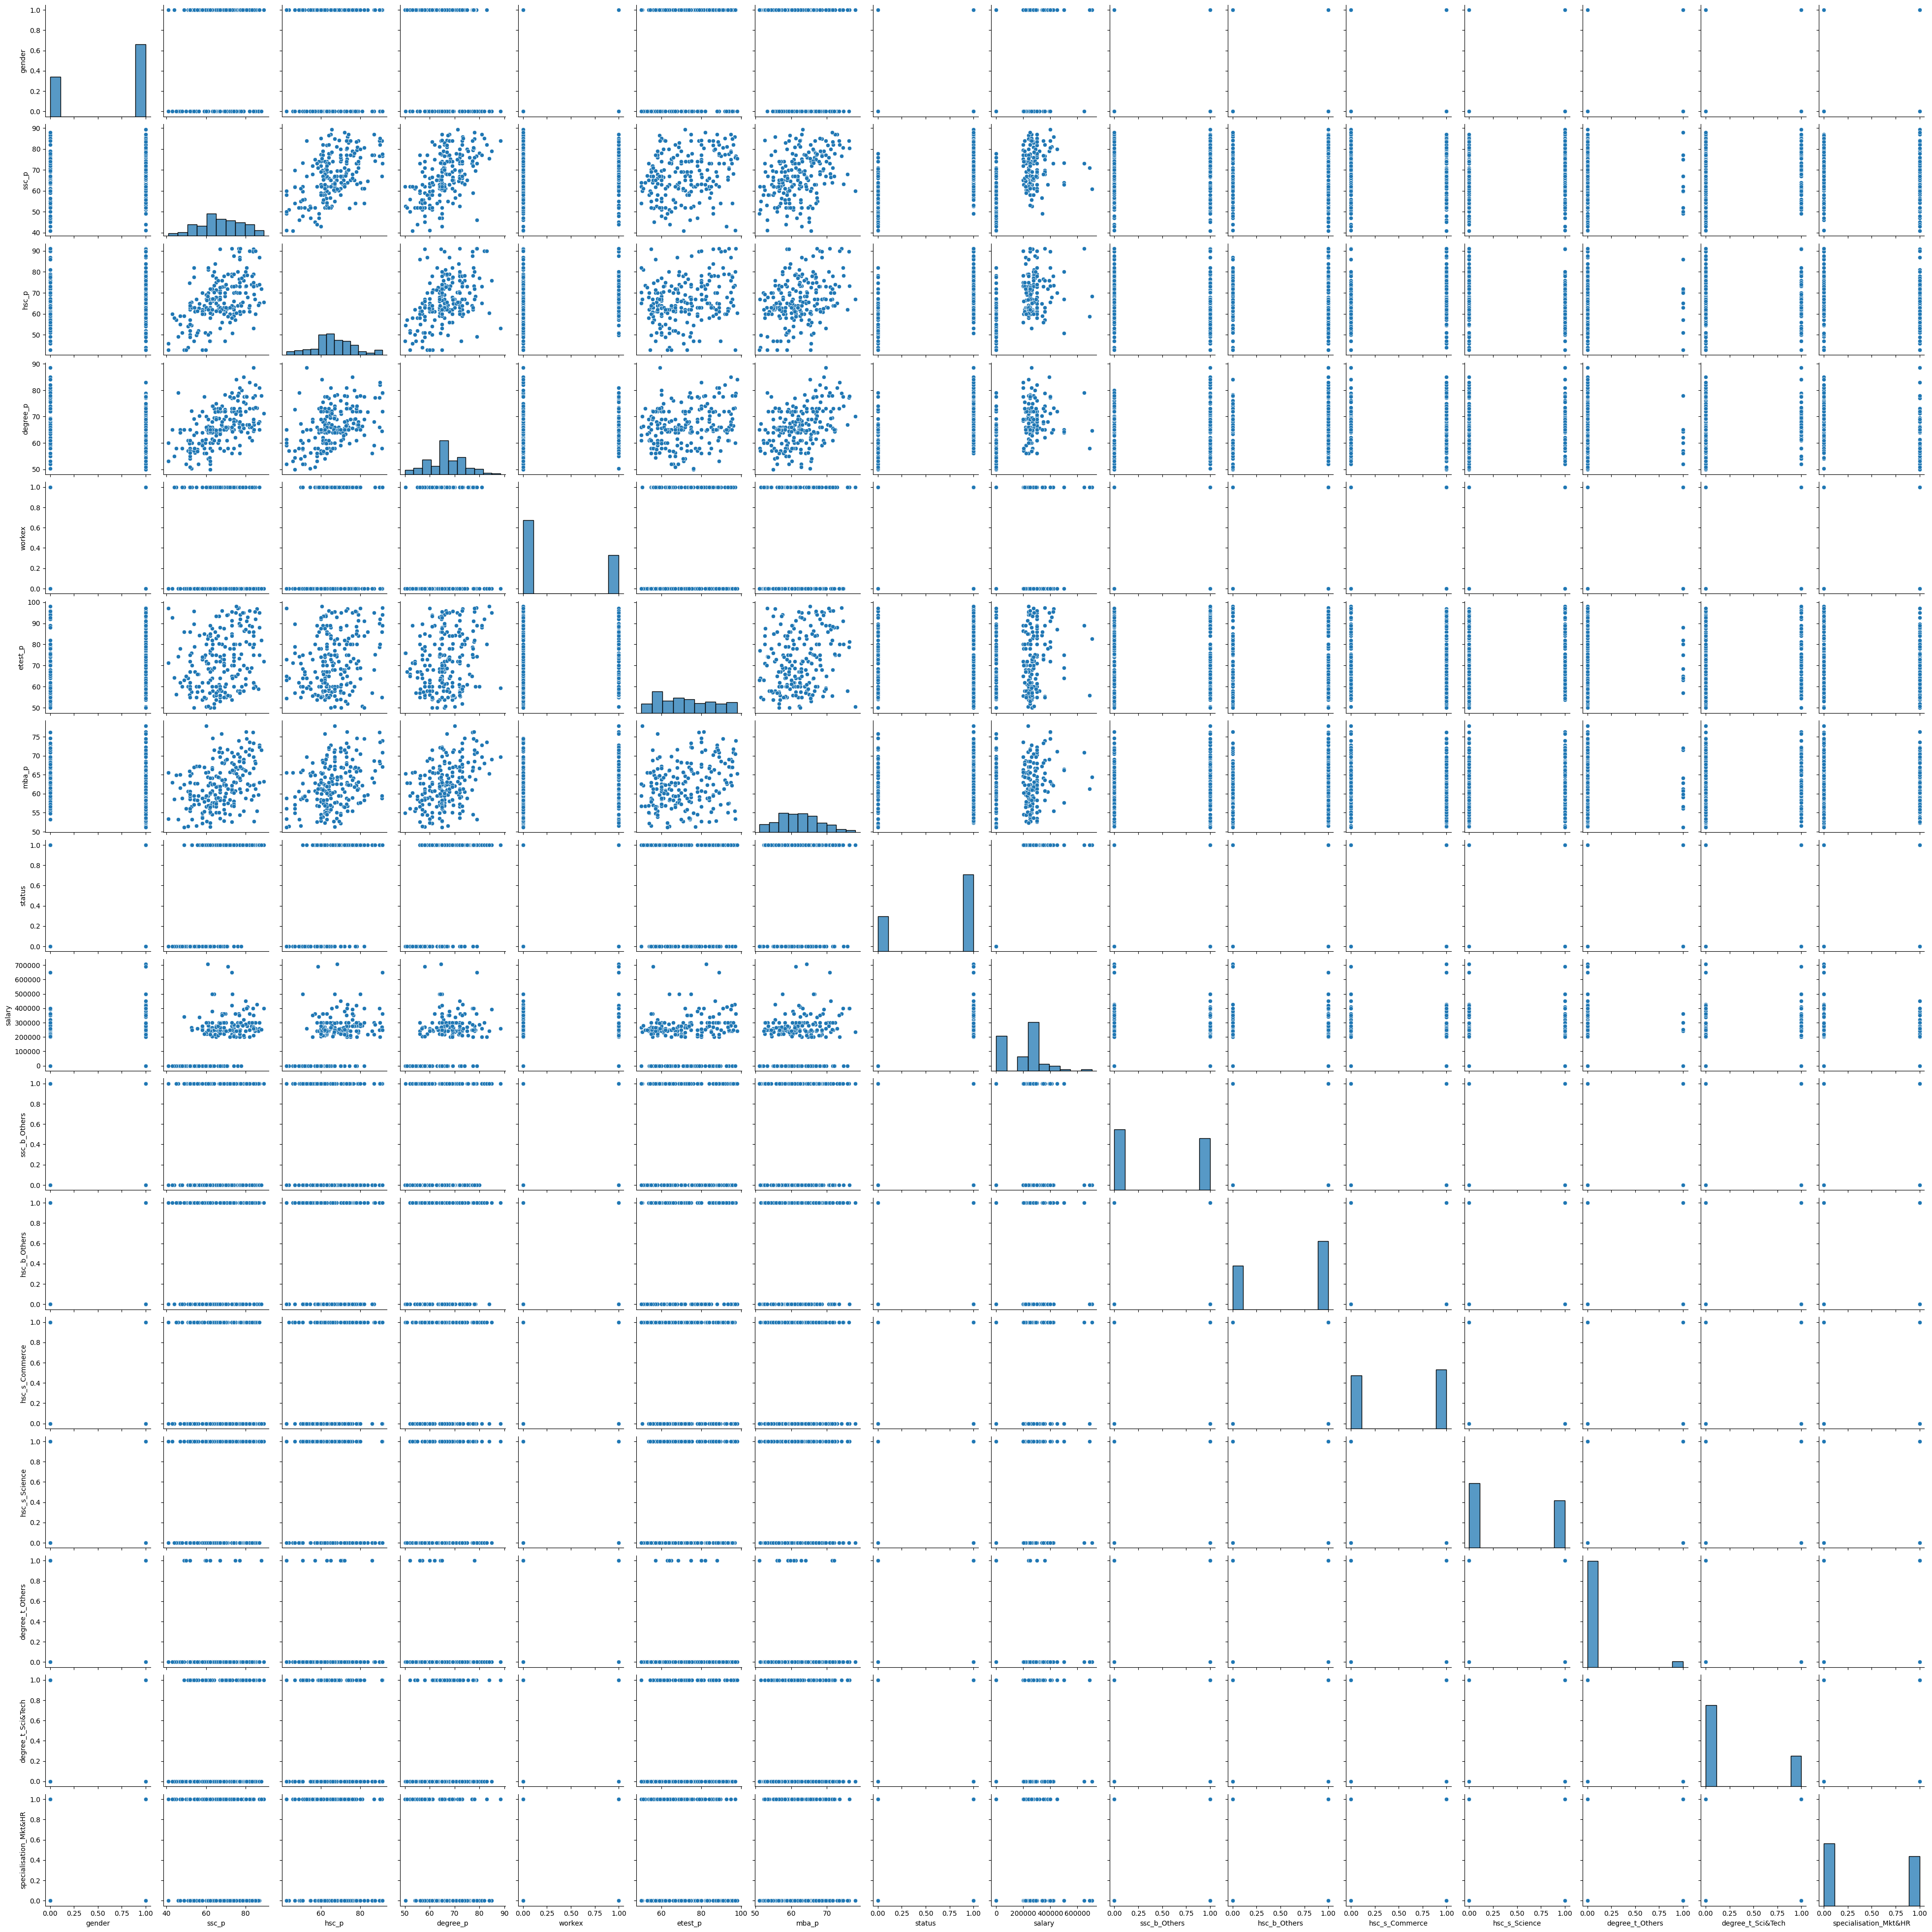

In [37]:
#to check multicollinearity
sns.pairplot(dataset)  #analysis using graph with correlation

In [ ]:
dataset.dtypes

In [ ]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if (dataset[columnName].dtype=='bool'):
            #print('qual')
            qual.append(columnName)
        else:
            #print('quan')
            quan.append(columnName)
    return quan, qual

In [ ]:
quan, qual=quanQual(dataset)

In [ ]:
quan

In [ ]:
qual

In [ ]:
dataset

In [38]:
#VIF quantifies multicollinearity among independent variables in a regression model.
#vif calculation is oly suitable for quantitative columns not for qualitative columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
#This imports the variance_inflation_factor function from statsmodels, which is used to calculate VIF.

#X--X is expected to be a pandas DataFrame containing independent variables.
def calc_vif(X):
    
    #This initializes an empty pandas DataFrame to store VIF values.
    vif=pd.DataFrame() 

    #This adds a column "variables" to the DataFrame containing the names of the independent variables
    vif["variables"]=X.columns  
    
    #This computes the VIF for each column in X using list comprehension.
    #X.values converts the DataFrame into a NumPy array.
    #range(X.shape[1]) iterates over each column index.
    #variance_inflation_factor(X.values, i) calculates the VIF for each independent variable.
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [39]:
calc_vif(dataset[['etest_p','salary']])  #give all quan columns and delete high value columns and have columns which are <5
#create model for these 2 

,variables,VIF
0,etest_p,2.826904
1,salary,2.826904


In [ ]:
#Simple Example:

#from statsmodels.stats.outliers_influence import variance_inflation_factor
#import pandas as pd
#import numpy as np

# Sample dataset
#data = {
 #   'Feature1': [1, 2, 3, 4, 5],
  #  'Feature2': [2, 4, 6, 8, 10],  # Perfectly correlated with Feature1
   # 'Feature3': [5, 3, 6, 9, 2]}

#df = pd.DataFrame(data)

# Compute VIF for each feature
#X = df.values
#vif_values = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print results
#print(vif_values)
#Breakdown of [ ... for i in range(X.shape[1])]:
#X.shape[1] → Gets the number of columns (features).
#for i in range(X.shape[1]) → Loops over each feature index.
#variance_inflation_factor(X, i) → Computes VIF for the i-th feature.
#The list comprehension collects all VIF values into a list.

In [4]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [8]:
dataset[dataset['gender']=='F']['salary']

6           0.0
12          0.0
13     218000.0
15     200000.0
17          0.0
         ...   
197    260000.0
198         0.0
204    210000.0
208         0.0
213    204000.0
Name: salary, Length: 76, dtype: float64

In [9]:
#INDEPENDENT SAMPLE - UNPAIRED T TEST
#Different group(male, female) but same condition(salary)--group is categorical data, condition is numerical value
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['salary']
female=dataset[dataset['gender']=='F']['salary']
#print(male)
ttest_ind(male,female)


TtestResult(statistic=2.0937842507001165, pvalue=0.03746230397067219, df=213.0)

In [ ]:
#ssc_p--others , central --salary

In [10]:
#DEPENDENT SAMPLE - PAIRED T TEST
#sAME group(male) but different condition(ssc_p,hsc_p)---group is categorical data, condition is numerical value
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['ssc_p']
male1=dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male,male1)

TtestResult(statistic=0.6842940392688153, pvalue=0.4949370716000775, df=138)

In [ ]:
#hsc_s--commerce ---mba_p,etest_p

In [ ]:
#HYPOTHESIS TESTING
#statement: Test whether ssc_p of male and hsc_p of male is same.
#Null Hypothesis: there is no similarity between 1oth and 12th pass mark of male

In [11]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['ssc_p']
male1=dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male,male1)

TtestResult(statistic=0.6842940392688153, pvalue=0.4949370716000775, df=138)

In [ ]:
#Reject = Null Hypothesis if p value < 0.05 
#Acc to condition p value > 0.05 so accpt Null Hypothesis and reject Alternate Hypothesis
#there is no significant difference

In [12]:
#Anavo--Analysis of variance
#one way classification:
import scipy.stats as stats

stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])

F_onewayResult(statistic=0.695991304348204, pvalue=0.4989557472581533)

In [ ]:
#H1--there is a significant difference between these columns(Alternative hypothesis)

In [19]:
#scipy.stats: Provides statistical functions, but isn't used in this code snippet.
#statsmodels.api: Contains tools for statistical modeling, including regression and ANOVA.
#ols from statsmodels.formula.api: Used to specify an Ordinary Least Squares (OLS) regression model, which is the foundation for ANOVA.

import scipy.stats as stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

#Formula: "salary ~ etest_p + mba_p + etest_p:mba_p"
#salary: Dependent variable (what we are predicting).
#etest_p: Independent variable 1 (e.g., Entrance test percentage).
#mba_p: Independent variable 2 (e.g., MBA percentage).
#etest_p:mba_p: Interaction effect between etest_p and mba_p, checking if the effect of one depends on the other.
#.fit(): Fits the model to the dataset.
  
# Performing two-way ANOVA 
model = ols("salary ~ etest_p + mba_p + etest_p:mba_p", data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

#anova_lm(model, typ=2): Performs an ANOVA (Analysis of Variance) test on the fitted model.
#typ=2: Specifies Type-II Sum of Squares for the ANOVA table, which is commonly used when the factors are unbalanced.


In [20]:
anova_table

,sum_sq,df,F,PR(>F)
etest_p,1.234317e+11,1.0,5.706748,0.017781
mba_p,5.146302e+10,1.0,2.379343,0.124448
etest_p:mba_p,5.079912e+10,1.0,2.348648,0.126890
Residual,4.563737e+12,211.0,NaN,NaN


In [ ]:
#sum_sq: Sum of squares, indicating variance explained by each factor.
#df: Degrees of freedom, representing independent pieces of information used.
#F: F-statistic, which measures how significant the effect of the variable is.
#PR(>F): p-value (probability value), which tells us the statistical significance.
#etest_p (p = 0.017781) → Statistically significant (p < 0.05), meaning this variable has a significant effect.
#mba_p (p = 0.124448) → Not significant (p > 0.05), meaning it likely does not have a strong effect.
#etest_p:mba_p (p = 0.126890) → Interaction effect is also not significant.
#The probability (p-value) is in the PR(>F) column. Lower p-values (<0.05) indicate significant effects.

In [ ]:
#The F-value is compared because it measures how much a variable explains the outcome compared to random variation (errors).
#A higher F-value means the variable has a stronger effect.
#The p-value (PR > F) tells if this effect is significant or just due to chance.
#We compare F because it helps decide if a variable truly matters in predicting the outcome.